In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
sys.path.append("/home/psa_images/SemiF-AnnotationPipeline/segment/")
sys.path.append("/home/psa_images/SemiF-AnnotationPipeline/")
from semif_utils.utils import cutoutmeta2csv


/home/mkutuga/anaconda3/envs/semif/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [31]:
# cutoutdir = "/mnt/research-projects/s/screberg/longterm_images/semifield-cutouts"
cutoutdir = "../data/semifield-cutouts/TX_2023-01-25"
batch = True

In [32]:
if not batch:
    data = Path(cutoutdir).glob("*")
    csvs = []
    for a in data:
        csv = list(a.glob("*.csv"))
        if len(csv) > 0:
            csvs.append(csv[0])
    df = pd.concat([pd.read_csv(x, low_memory=False) for x in csvs])
else:
    x = list(Path(cutoutdir).glob("*.csv"))
    df = pd.read_csv(x[0], low_memory=False)

df["state_id"] = df.batch_id.str.split("_", expand=False).str[0]
df["date"] = df.batch_id.str.split("_", expand=False).str[1]
df["common_name"] = np.where(df.common_name == "Common lambsquarters", "Lambsquarter", df.common_name)
df['dt'] = pd.to_datetime(df['date'])
df.columns.unique()[80:100]
df.USDA_symbol.unique()


array(['AVSA', 'colorchecker', 'AVST2'], dtype=object)

## Stats

## All images

In [13]:
sdf = df.drop_duplicates("image_id")
sdf = sdf.groupby(["common_name", "state_id"]).image_id.count().reset_index().sort_values("image_id")
sdf = sdf[sdf["common_name"]!="colorchecker"]
sdf

,common_name,state_id,image_id
3,cultivated radish,TX,133
0,Black oats,TX,139
1,Oats,TX,201


## All cutouts

In [9]:
sdf = df.groupby(["common_name", "state_id"]).cutout_id.count().reset_index().sort_values("cutout_id")
sdf = sdf[sdf["common_name"]!="colorchecker"]
sdf

,common_name,state_id,cutout_id
1,Mustards,TX,531
4,cultivated radish,TX,1283
2,Oats,TX,4847
0,Black oats,TX,11262


## Primary Cutouts (unique)

In [13]:
sdf = df[df["is_primary"] == True]
sdf = sdf.groupby(["common_name", "state_id"]).cutout_id.count().reset_index().sort_values("cutout_id")
sdf = sdf[sdf["common_name"]!="colorchecker"]
sdf


,common_name,state_id,cutout_id
1,Mustards,TX,154
4,cultivated radish,TX,233
2,Oats,TX,1111
0,Black oats,TX,3331


# Total Number of batches

/home/mkutuga/anaconda3/envs/semif_gpu/lib/python3.9/site-packages/seaborn/categorical.py:3202: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


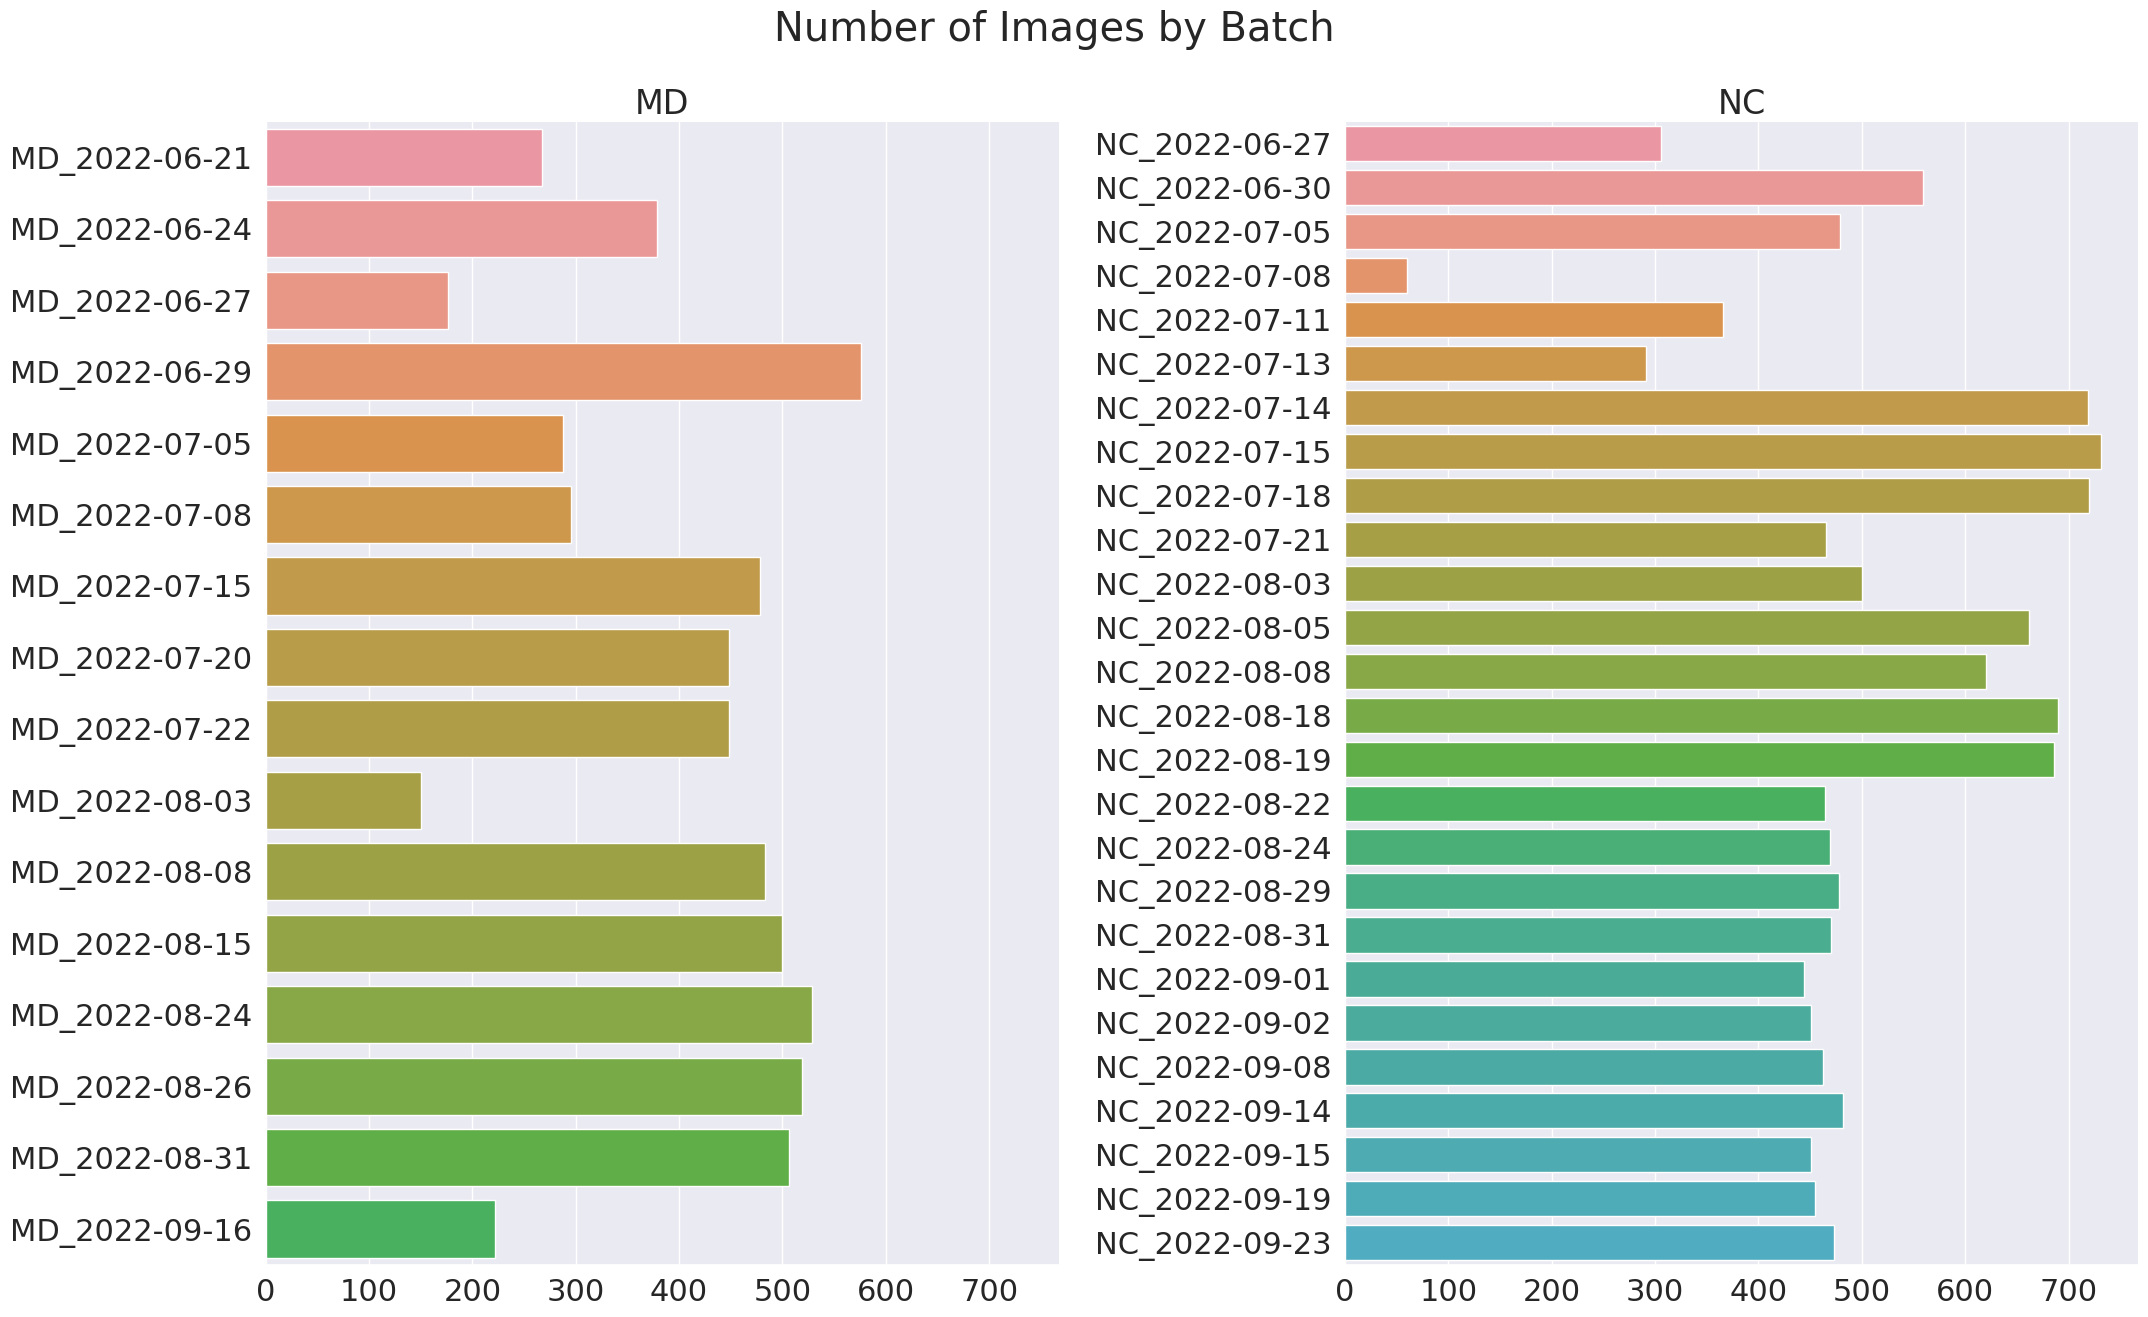

In [26]:
# plt.style.use('ggplot')
# sns.set_context("poster")
sns.set(font_scale=2)
tdf = df.drop_duplicates("image_id")

g = sns.catplot(
    data=tdf,
    y="batch_id",
    col="state_id",
    sharey=False,
    kind="count",
    aspect=.8,
    height=14
)
g.set(xlabel="", ylabel="")
g.set_titles(col_template="{col_name}")

g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Number of Full Bench Images by Batch')
g.savefig("../assets/Images_by_batch_summer_weeds_2022.png", dpi=300)

# Number of images per species

        common_name state_id  image_id
9             Maize       MD       442
7      Lambsquarter       MD       497
13   Smooth pigweed       MD       530
5         Horseweed       MD       558
2      Fall panicum       MD       566
3     Giant foxtail       MD       801
16       Velvetleaf       MD       879
4        Goosegrass       NC       913
6       Jimson weed       MD       965
17   Yellow foxtail       MD       978
11  Purple nutsedge       NC      1104
1    Common ragweed       NC      1112
12        Sicklepod       NC      1290
14          Soybean       NC      1433
15     Texas millet       NC      1541
8   Large crabgrass       NC      1576
10  Palmer amaranth       NC      1856
0         Cocklebur       NC      1864


/home/mkutuga/anaconda3/envs/semif_gpu/lib/python3.9/site-packages/seaborn/categorical.py:3202: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


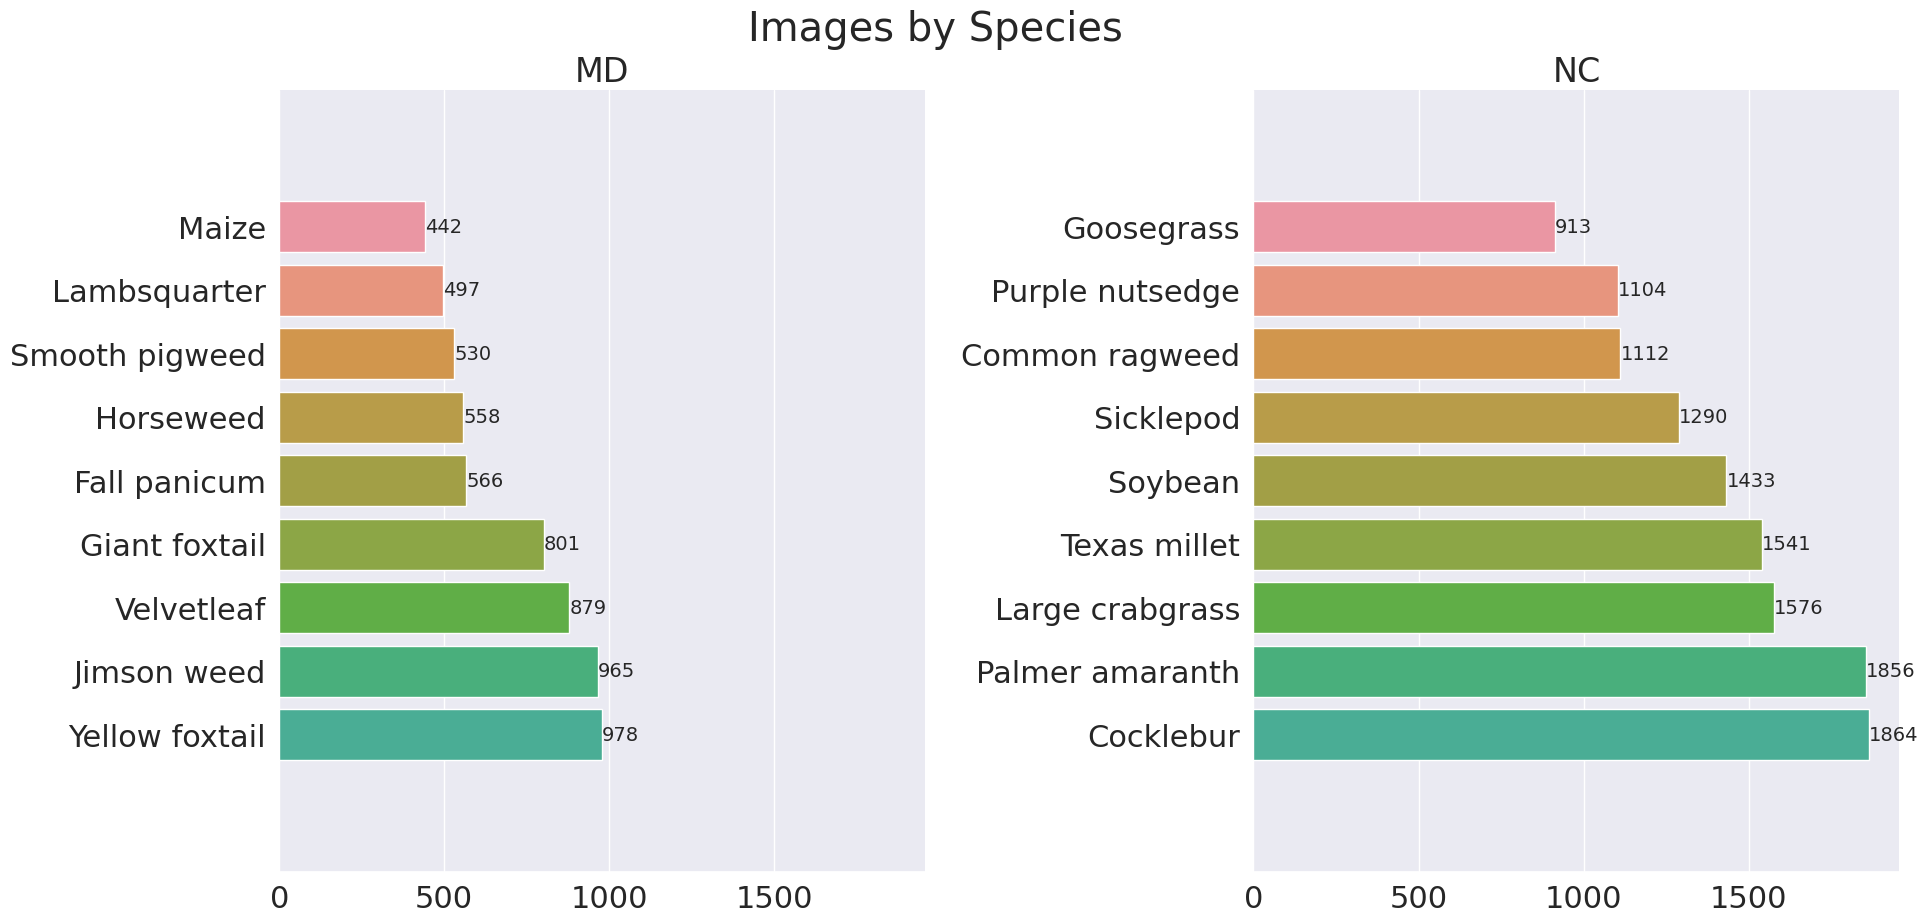

In [28]:

sns.set(font_scale=2)
sdf = df.drop_duplicates("image_id")
sdf = sdf.groupby(["common_name", "state_id"]).image_id.count().reset_index().sort_values("image_id")
sdf = sdf[sdf["common_name"]!="colorchecker"]
print(sdf)
g = sns.catplot(
    data=sdf,
    x="image_id",
    y="common_name",
    orient="horizontal",
    col="state_id",
    sharey=False,
    kind="bar",
    height=10
)
g.set(xlabel="", ylabel="")
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Full Bench Images by Species')
# g.savefig("../assets/Images_by_species_summer_weeds_2022.png", dpi=300)
# sns.set(font_scale=1)
for ax in g.axes.ravel():
    # add annotations
    for c in ax.containers:
        # labels = [f'{(v.get_width() / 1000):.1f}K' for v in c]
        labels = [int(v.get_width()) for v in c]
        ax.bar_label(c, labels=labels, label_type='edge',fontsize=14)
    ax.margins(y=0.2)
# g.savefig("../assets/Images_by_species_summer_weeds_2022_labeled.png", dpi=300)
plt.show()

## Number of Cutout sub-images by batch

Text(0.5, 0.98, 'Number of Cutouts (sub-images) by Batch')

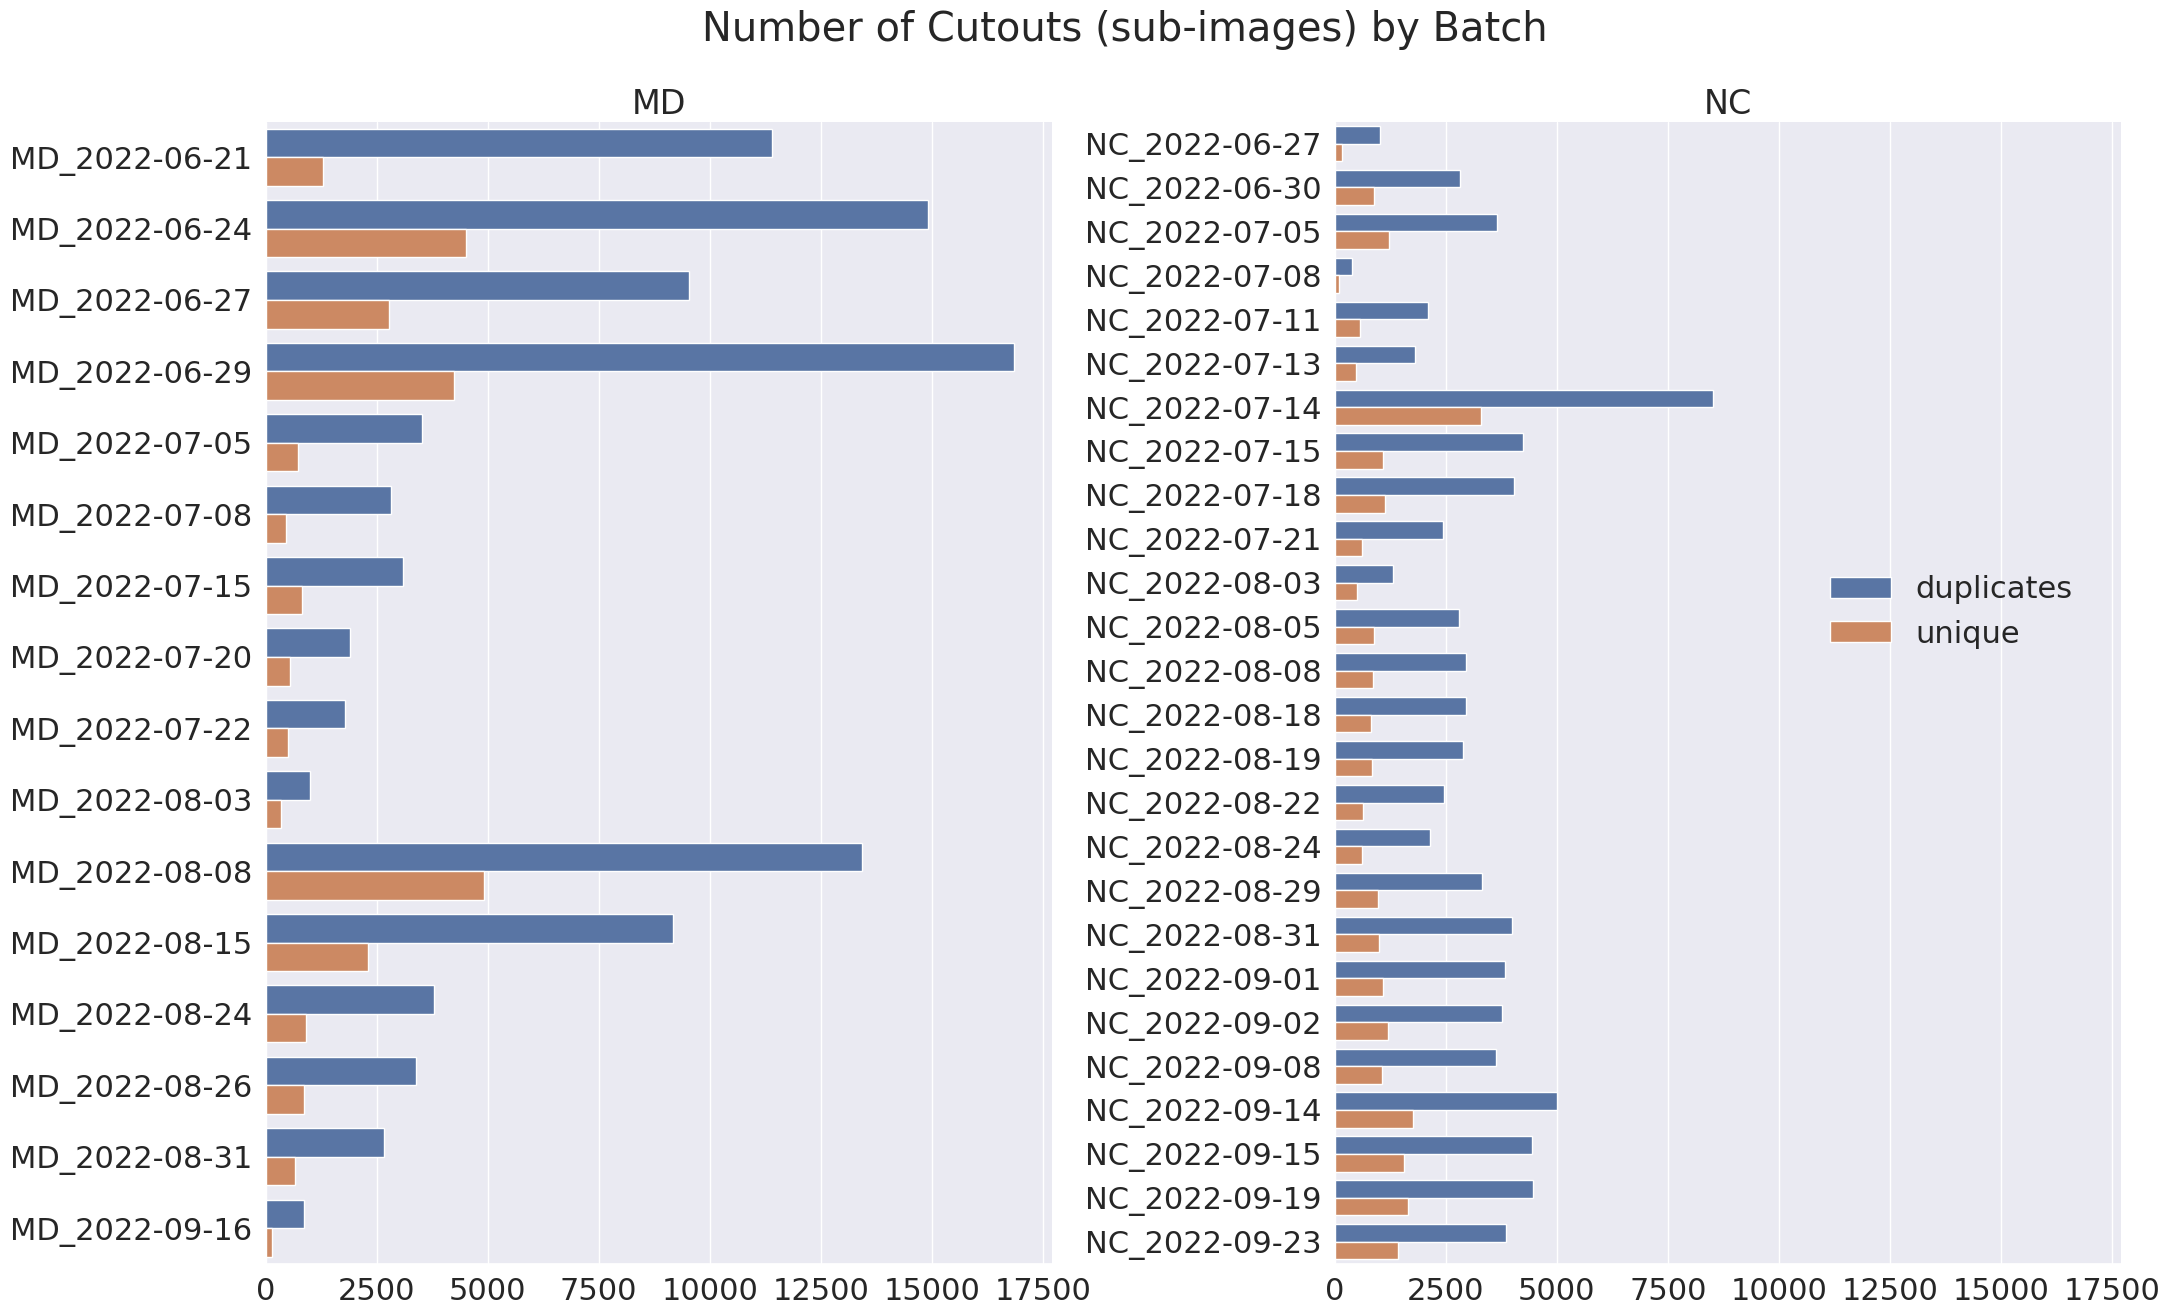

In [75]:
c = df.groupby(["batch_id", "state_id","is_primary"]).cutout_id.count().reset_index().sort_values("batch_id")
sns.set(font_scale=2)

g = sns.catplot(
    data=c,
    x="cutout_id",
    y="batch_id",
    hue="is_primary", 
    orient="horizontal",
    col="state_id",
    sharey=False,
    kind="bar",
    aspect=.8,
    height=14
)
g.set(xlabel="", ylabel="")
g.set_titles(col_template="{col_name}")
g._legend.set_title("")
# replace labels
new_labels = ['duplicates', 'unique']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

sns.move_legend(g, "center right", bbox_to_anchor=(.9, .55), frameon=False)

g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Number of Cutouts (sub-images) by Batch')
# g.savefig("../assets/Cutouts_by_batch_summer_weeds_2022.png", dpi=300)


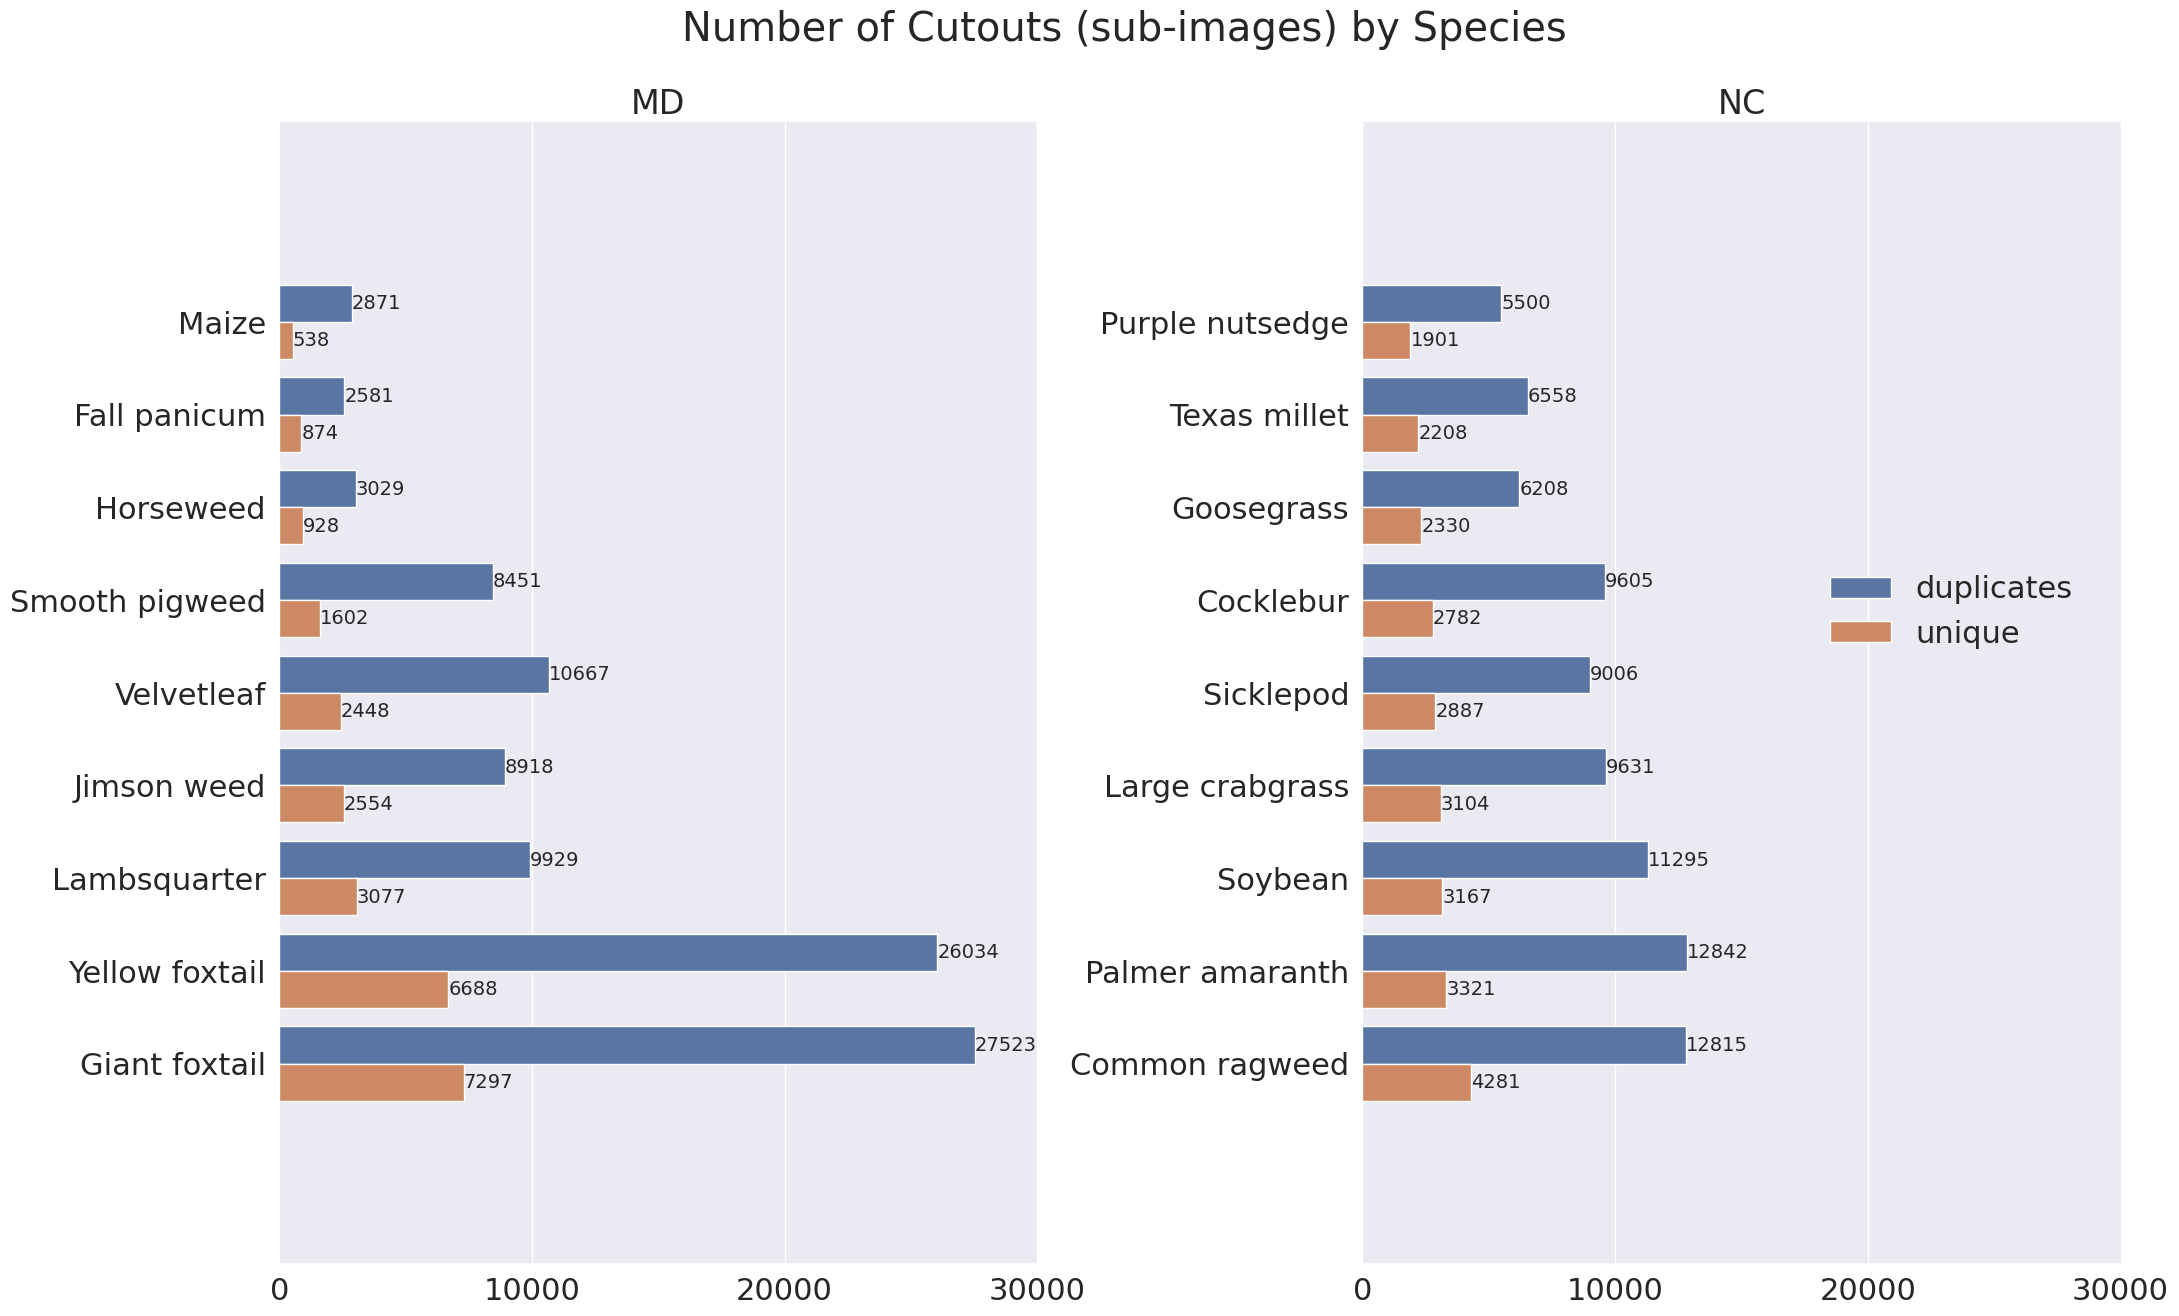

In [31]:
c = df.groupby(["common_name", "state_id", "is_primary"]).cutout_id.count().reset_index().sort_values("cutout_id")
c = c[c["common_name"]!="colorchecker"]

sns.set(font_scale=2)

g = sns.catplot(
    data=c,
    x="cutout_id",
    y="common_name",
    hue="is_primary",
    orient="horizontal",
    col="state_id",
    sharey=False,
    kind="bar",
    aspect=.8,
    height=14
)
g.set(xlabel="", ylabel="")
g.set_titles(col_template="{col_name}")
g._legend.set_title("")
# replace labels
new_labels = ['duplicates', 'unique']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

sns.move_legend(g, "center right", bbox_to_anchor=(.9, .55), frameon=False)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)


g.set(xticks=np.arange(0,36000,10000))
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Number of Cutouts (sub-images) by Species')
# g.savefig("../assets/Cutouts_by_species_summer_weeds_2022.png", dpi=300)
# iterate through axes
for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        # labels = [f'{(v.get_width() / 1000):.1f}K' for v in c]
        labels = [int(v.get_width()) for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', fontsize=14)
    ax.margins(y=0.2)
g.savefig("../assets/Cutouts_by_species_summer_weeds_2022_labeled.png", dpi=300)
plt.show()
